___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


#check GPU device works well or not if the results = 1 works well or if it is zero not works  

In [ ]:
#!pip install --user -U --no-warn-script-location --force-reinstall charset-normalizer


  Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl.metadata (34 kB)
Using cached charset_normalizer-3.3.2-cp310-cp310-win_amd64.whl (100 kB)
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.3.2
    Uninstalling charset-normalizer-3.3.2:
      Successfully uninstalled charset-normalizer-3.3.2


  You can safely remove it manually.


In [ ]:
#import tensorflow as tf

In [ ]:
#from tensorflow import keras

In [ ]:
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!pip3 install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
#df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.describe().T

count          mean          std   min      25%  \
Unnamed: 0               23486.0  11742.500000  6779.968547   0.0  5871.25   
Clothing ID              23486.0    918.118709   203.298980   0.0   861.00   
Age                      23486.0     43.198544    12.279544  18.0    34.00   
Rating                   23486.0      4.196032     1.110031   1.0     4.00   
Recommended IND          23486.0      0.822362     0.382216   0.0     1.00   
Positive Feedback Count  23486.0      2.535936     5.702202   0.0     0.00   

                             50%       75%      max  
Unnamed: 0               11742.5  17613.75  23485.0  
Clothing ID                936.0   1078.00   1205.0  
Age                         41.0     52.00     99.0  
Rating                       5.0      5.00      5.0  
Recommended IND              1.0      1.00      1.0  
Positive Feedback Count      1.0      3.00    122.0

In [ ]:
df.shape

(23486, 11)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [ ]:
sum(df.duplicated())

0

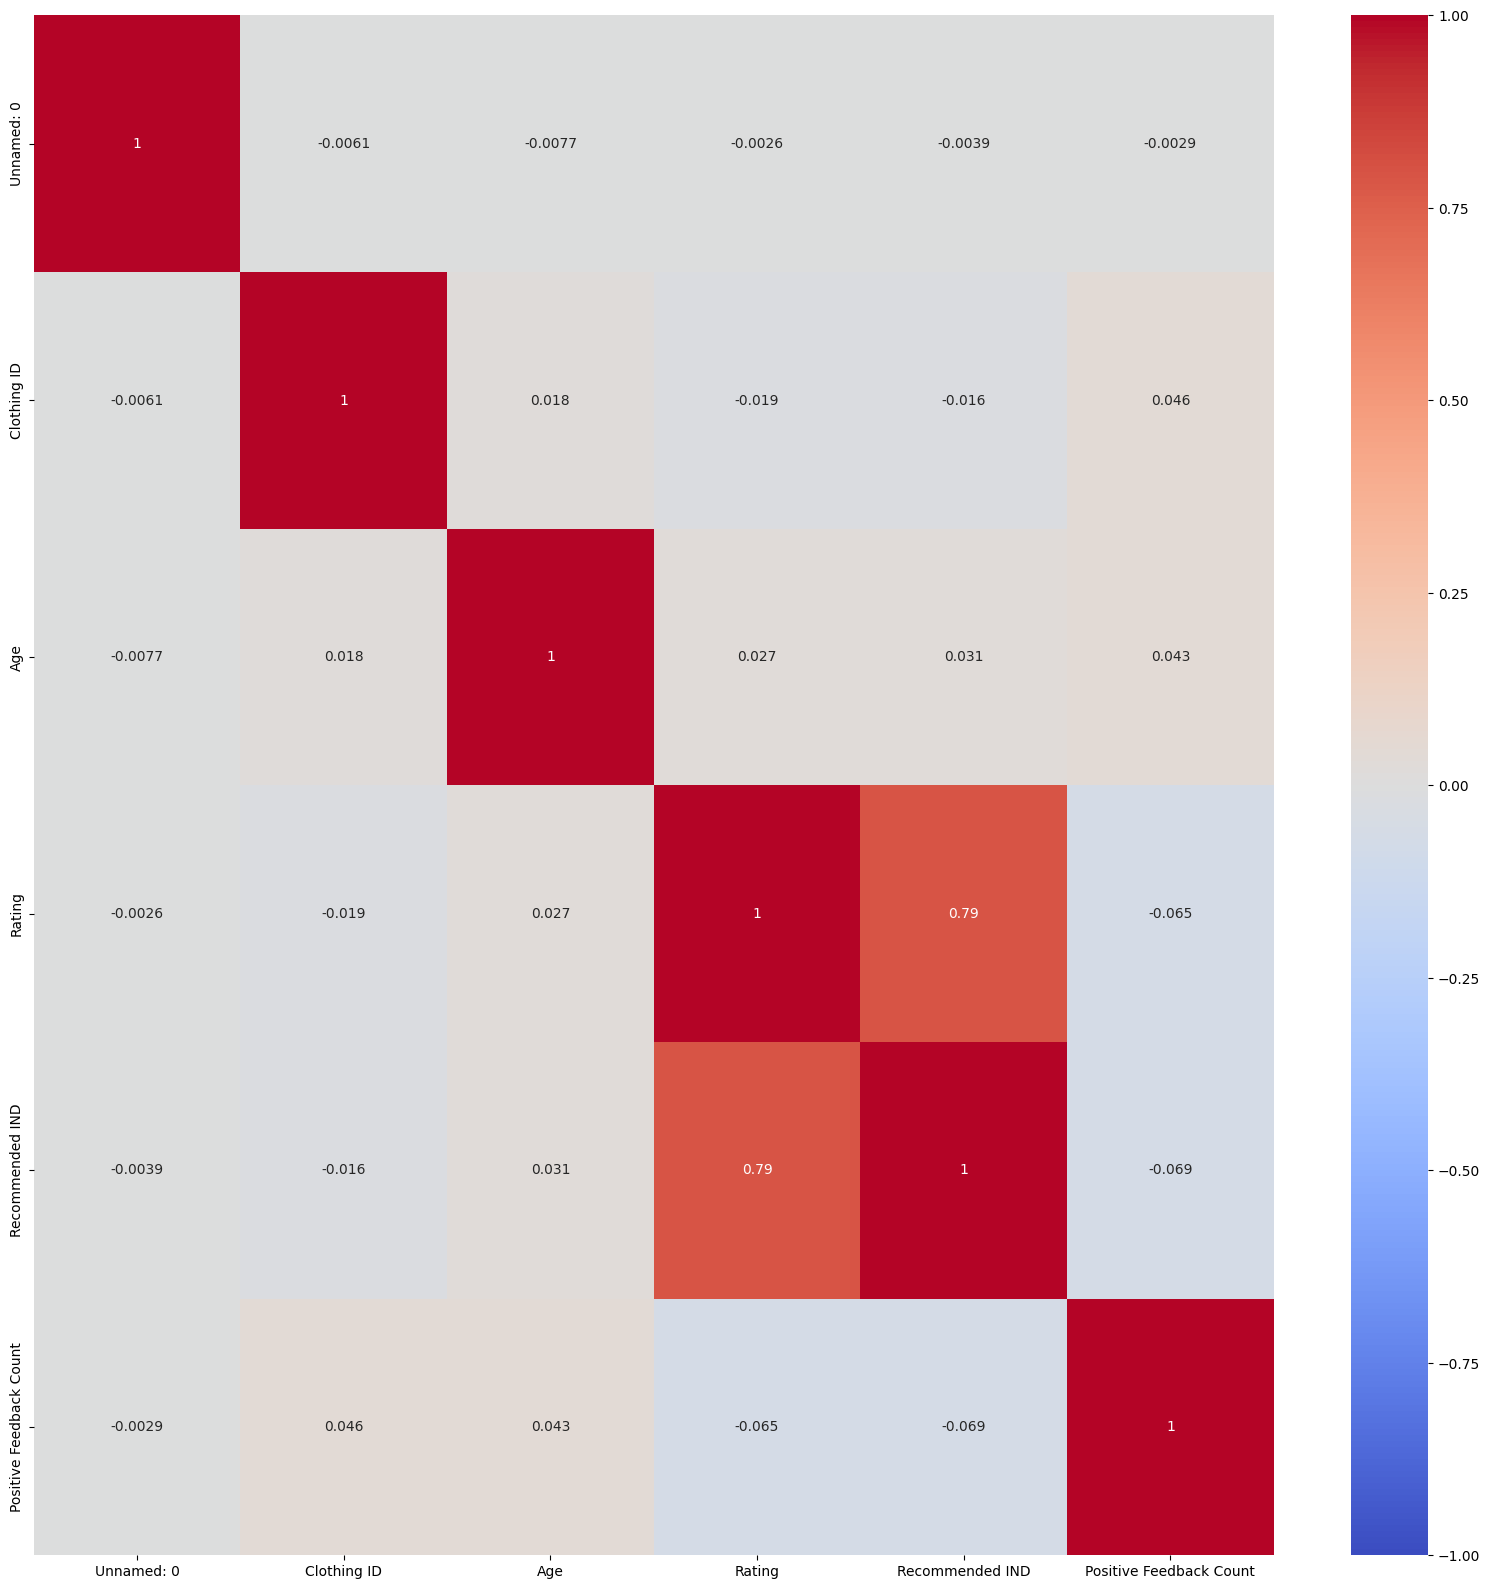

In [ ]:
# as we expected there are high correlation between 'rating' and 'recommended'
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

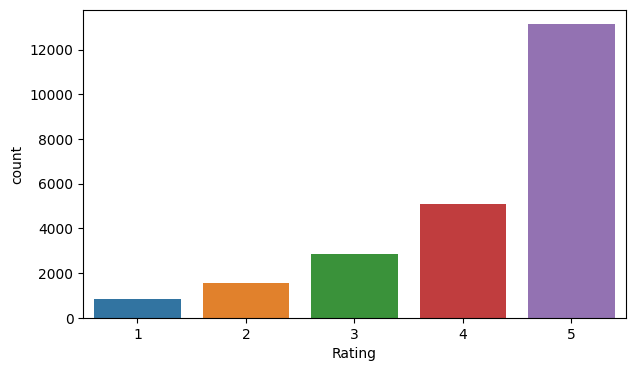

In [ ]:
# Rating the product as 5 which means best, are higher than the rest
sns.countplot(data =df, x ="Rating")

Text(0.5, 1.0, 'Temperatures Degrees in Cairo')

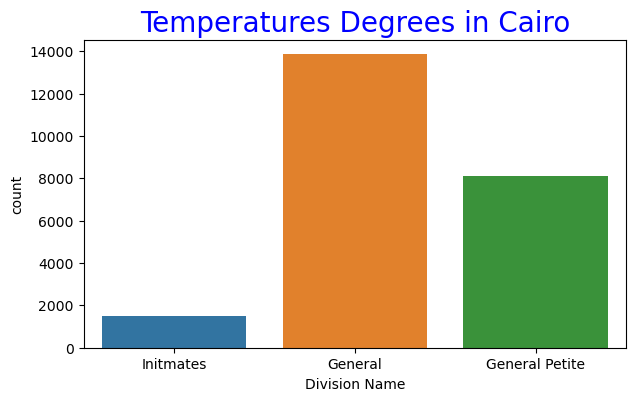

In [ ]:
sns.countplot(x='Division Name',data=df)
plt.title('Temperatures Degrees in Cairo' , fontsize=20 ,color='b')

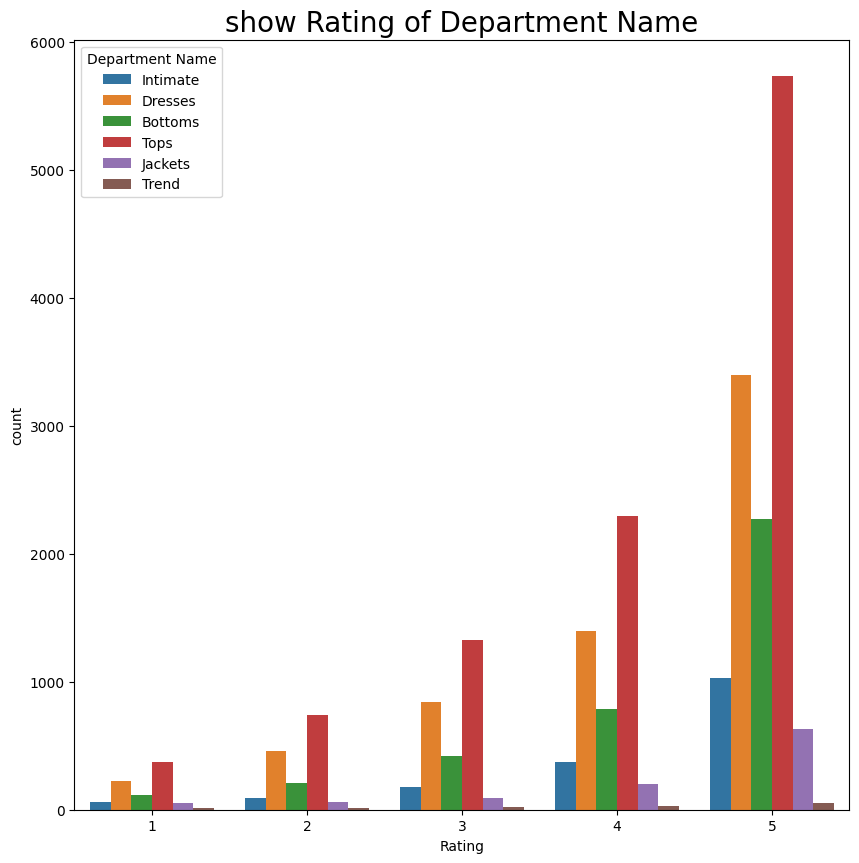

In [ ]:
# Tops take the majority
plt.figure(figsize=(10, 10))
sns.countplot(data =df, x ="Rating", hue='Department Name')
plt.title('show Rating of Department Name' , fontsize=20)
plt.show()

<BarContainer object of 13850 artists>

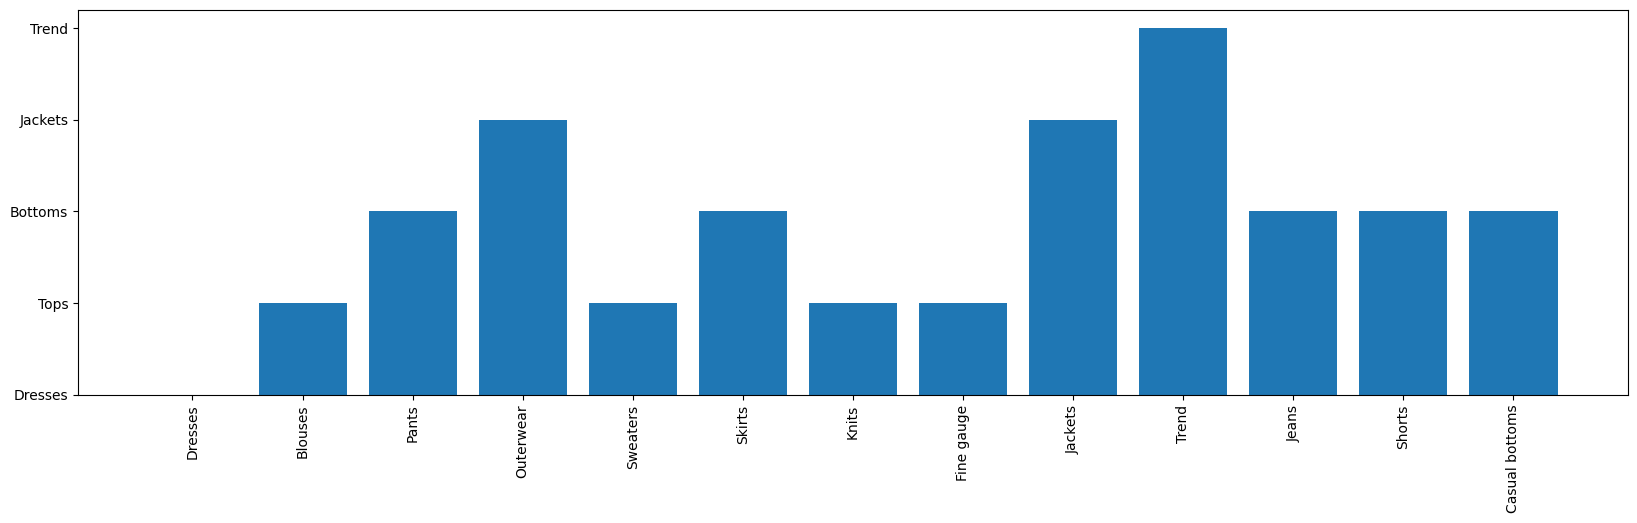

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(df[df['Division Name'] =='General']['Class Name'], df[df['Division Name'] =='General']['Department Name'])

<BarContainer object of 8120 artists>

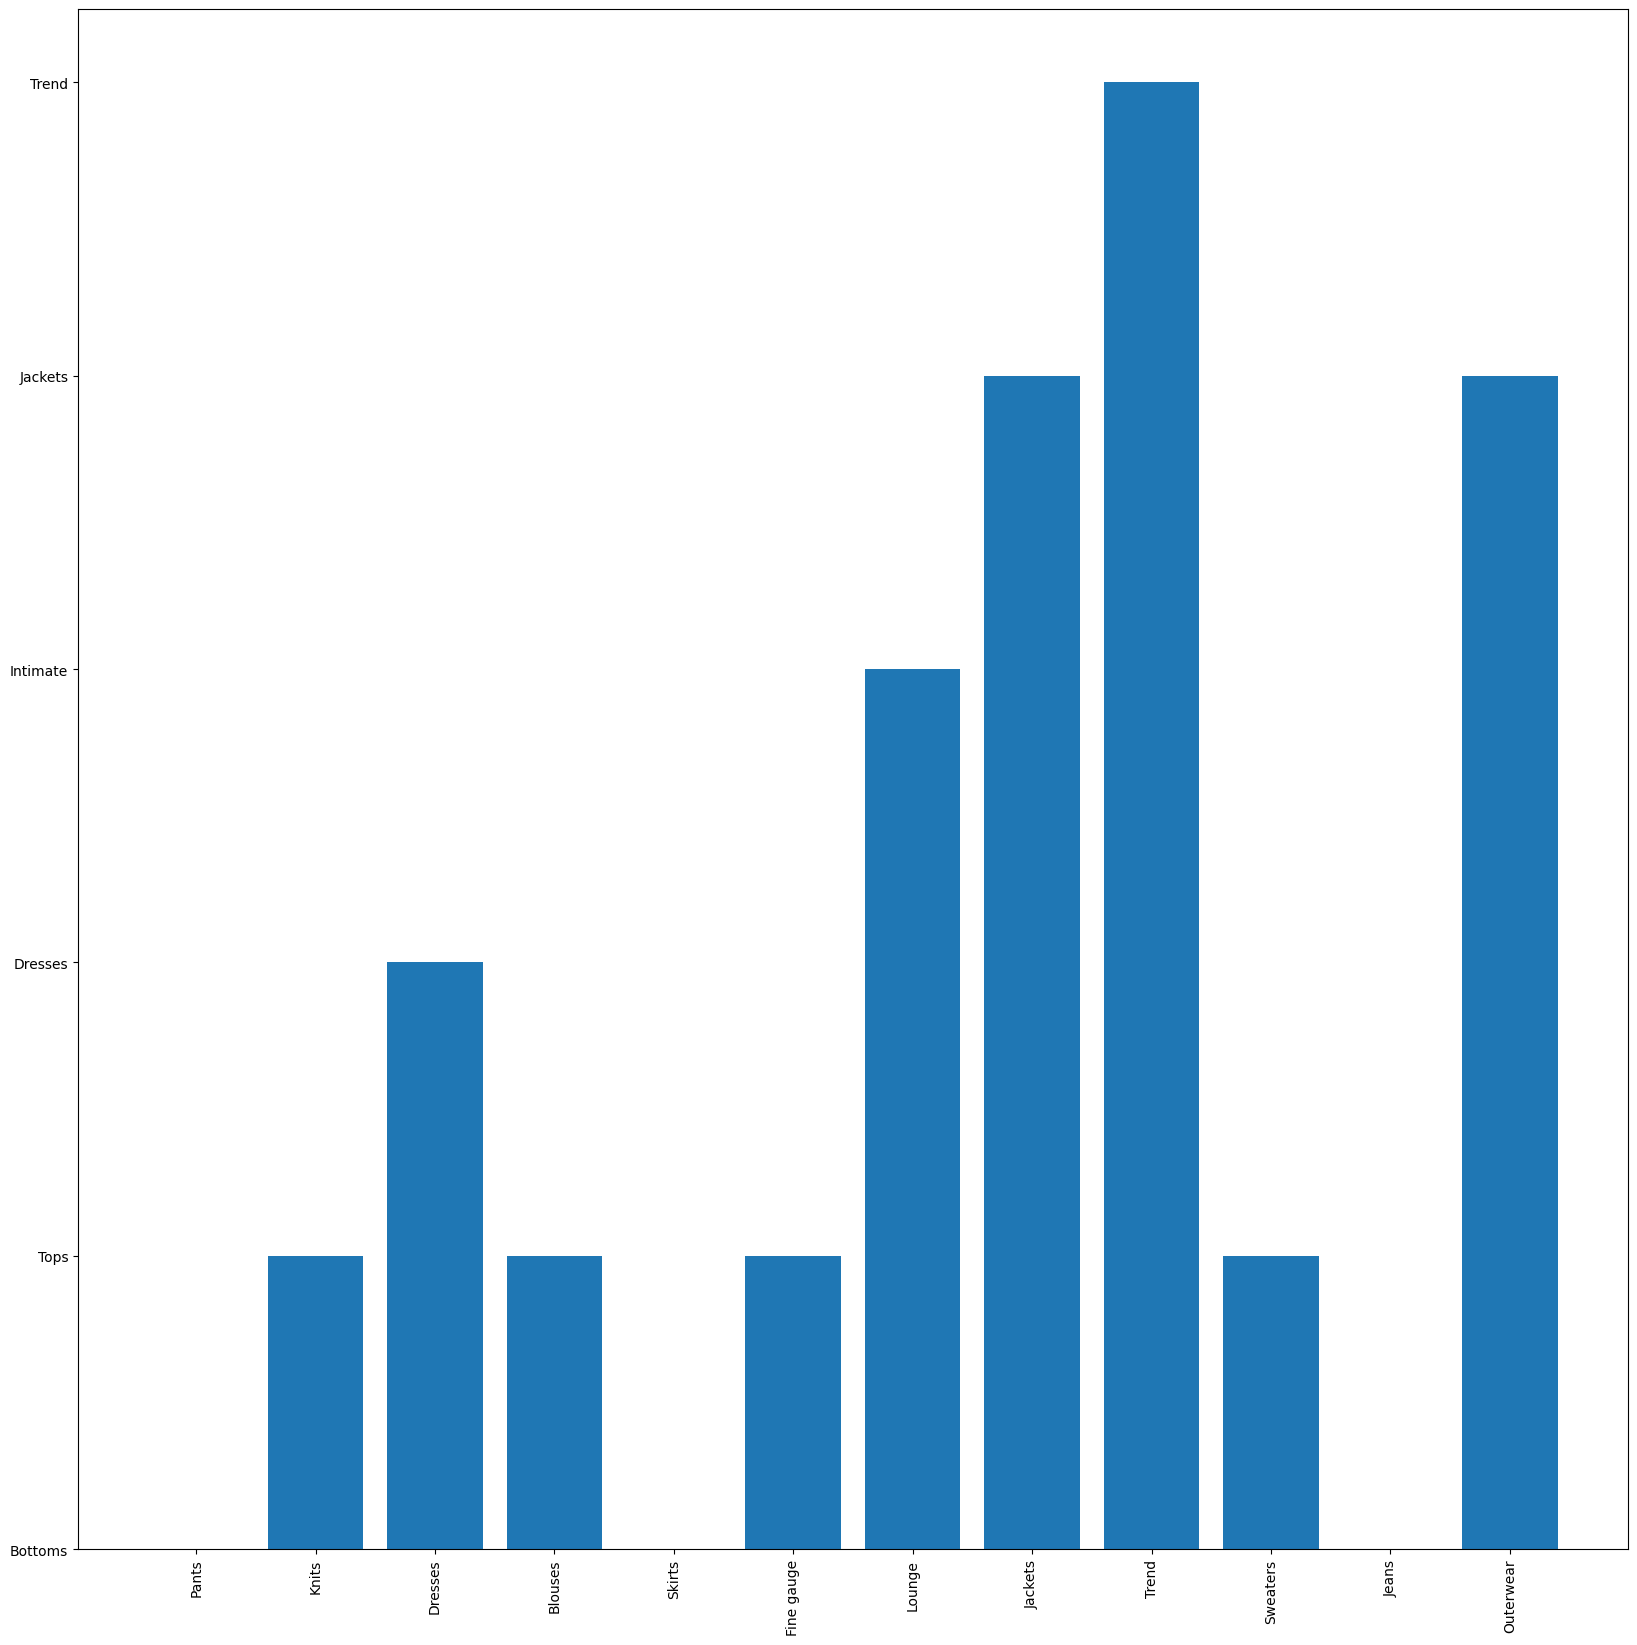

In [ ]:
fig , ax= plt.subplots(1,1 ,figsize=(20,20))
plt.xticks(rotation=90)
plt.bar(df[df['Division Name']=='General Petite']['Class Name'],df[df['Division Name']=='General Petite']['Department Name'])

In [ ]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [ ]:
# There are imbalanced where 'Recommended' take the majority
df['Recommended_IND'].value_counts()

1    19314
0     4172
Name: Recommended_IND, dtype: int64

<Axes: xlabel='Recommended_IND', ylabel='count'>

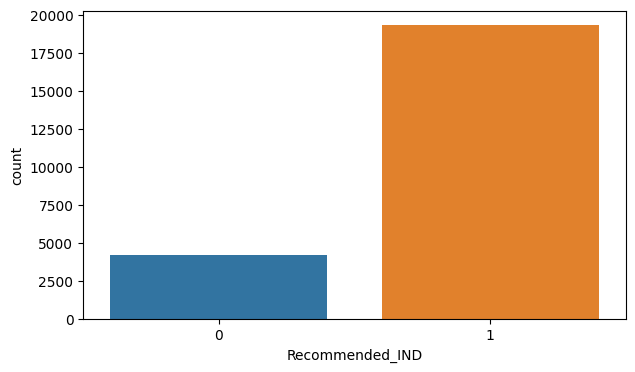

In [ ]:
sns.countplot(x=df["Recommended_IND"])

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df=df[['Review_Text','Recommended_IND']]
df.head()

Review_Text  Recommended_IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [ ]:
df.rename(columns={"Review_Text":"Review", "Recommended_IND":"Class"}, inplace=True)
df.head()

Review  Class
0  Absolutely wonderful - silky and sexy and comf...      1
1  Love this dress!  it's sooo pretty.  i happene...      1
2  I had such high hopes for this dress and reall...      0
3  I love, love, love this jumpsuit. it's fun, fl...      1
4  This shirt is very flattering to all due to th...      1

---
---


### Missing Value Detection

In [ ]:
# A lot of null in the reviews
print(df.isnull().sum())

Review    845
Class       0
dtype: int64


In [ ]:
# since it is a text its better to drop all the missing
# deleting missed vales
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

Review  Class
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
22636  I was very happy to snag this dress at such a ...      1
22637  It reminds me of maternity clothes. soft, stre...      1
22638  This fit well, but the top was very see throug...      0
22639  I bought this dress for a wedding i have this ...      1
22640  This dress in a lovely platinum is feminine an...      1

[22641 rows x 2 columns]

In [ ]:
print(df.isnull().sum())

Review    0
Class     0
dtype: int64


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
#stop_words

In [ ]:
def cleaning(data):

    #Tokenization
    text_tokens = word_tokenize(data.lower())

    # Noise Removal
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    # Lexicon Normalization
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
# First we take the positive and negative sentences
pos = df[df["Class"] == 1]["Review"]
#pos = cleaning(pos)
pos = pos.apply(cleaning)
pos

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store gla...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22635    sure ordering skirt could see person first gla...
22636    happy snag dress great price easy slip flatter...
22637    reminds maternity clothes soft stretchy shiny ...
22639    bought dress wedding summer cute unfortunately...
22640    dress lovely platinum feminine fit perfectly e...
Name: Review, Length: 18540, dtype: object

In [ ]:
neg = df[df["Class"] == 0]["Review"]
neg = neg.apply(cleaning)
neg

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper would purch...
25       loved material didnt really look long dress pu...
                               ...                        
22606    tried color really pretty fun want pair pant l...
22607    wanted love jacket soft great color unfortunat...
22617    purchased good price typically love maeve fabr...
22634    surprised positive review product terrible cut...
22638    fit well top see never would worked glad able ...
Name: Review, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
# here we split sentences into words for both positive and negative
WC_pos = " ".join(review for review in pos) # where WC stands for WorldCloud
WC_pos

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long go petite also bit loose xx kept wil ldecide later since light color already sold hte small

In [ ]:
WC_neg = " ".join(neg) # where WC stands for WorldCloud
WC_neg

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first pullover styling side zipper would purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning sure find something exchange loved m

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
!pip3 install wordcloud

In [ ]:
!pip3 install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip3 install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
# for this erorr 'ValueError: Only supported for TrueType fonts'
!pip3 install freetype-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud

In [ ]:
world_cloud_pos = WordCloud(background_color="white", max_words =250)

In [ ]:
world_cloud_pos.generate(WC_pos)

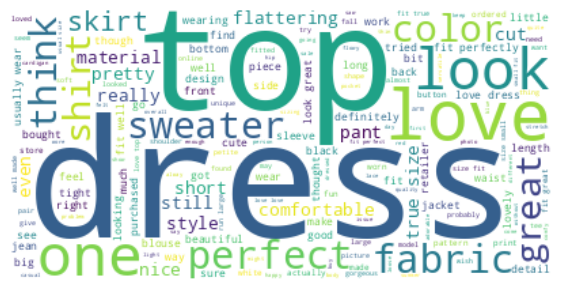

In [ ]:
# We could notice that the words 'dress' and 'top' reapeted a lot since most of our products are falling bellow dress and top departments
plt.figure()
plt.imshow(world_cloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
world_cloud_neg = WordCloud(background_color="white", max_words =250)

In [ ]:
world_cloud_neg.generate(WC_neg)

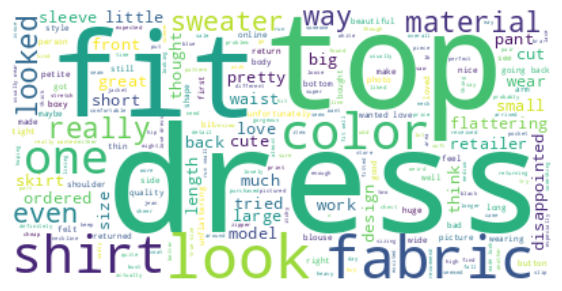

In [ ]:
plt.figure()
plt.imshow(world_cloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:
- pre-process, 'sara'
- Logistic Regression, 'zaynab'
- Naive Bayes, 'zaynab
- Support Vector Machine, sara
- Random Forest, rana
- Ada Boosting, rana

- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['Review'].values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0       0   0     0        0        0     0         0           0         0   
1       0   0     0        0        0     0         0           0         0   
2       0   0     0        0        0     0         0           1         0   
3       0   0     0        0        0     0         0           0         0   
4       0   0     0        0        0     0         0           0         0   
...    ..  ..   ...      ...      ...   ...       ...         ...       ...   
18107   0   0     0        0        0     0         0           0         0   
18108   0   0     0        0        0     0         0           0         0   
18109   0   0     0        0        0     0         0           0         0   
18110   0   0     0        0        0     0         0           2         0   
18111   0   0     0        0        0     0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
18107       0    0          0   0       0         0           0            0   
18108       0    0          0   0       0         0           0            0   
18109       0    0          0   0       0         0           0            0   
18110       0    0          0   0       0         0           0            0   
18111       0    0          0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
18107            0             0       0           0       0            0   
18108            0             0       0           0       0            0   
18109            0             0       0           0       0            0   
18110            0             0       0           0       0            0   
18111            0             0       0           0       0            0   

       accessorized  accessorizing  ...  yesterday  yet  yikes  yo  yoga  \
0                 0              0  ...          0    0      0   0     0   
1                 0              0  ...          0    0      0   0     0   
2                 0              0  ...          0    0      0   0     0   
3                 0              0  ...          0    0      0   0     0   
4                 0              0  ...          0    0      0   0     0   
...             ...            ...  ...        ...  ...    ...  ..   ...   
18107             0              0  ...          0    0      0   0     0   
18108             0              0  ...          0    0      0   0     0   
18109             0              0  ...          0    0      0   0     0   
18110             0              0  ...          0    0      0   0     0   
18111             0              0  ...          0    0      0   0     0   

       yoke  york  young  younger  youre  youthful  yr  yuck  yummy  zag  \
0         0     0      0        0      0         0   0     0      0    0   
1         0     0      0        0      0         0   0     0      0    0   
2         0     0      0       

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf_idf_vectorizer.get_feature_names_out()


array(['aa', 'ab', 'abby', ..., 'zipping', 'zone', 'zoom'], dtype=object)

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())
df_train_tfidf

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

In [ ]:
X_train[30]


'Feminine with beading in front. love the neckline and flow. nice fall colors. sleeves button. really nice fit in shoulders. if you like this style it is absolutely beautiful on. may be short on those with long torsos.'

In [ ]:
df_train_tfidf.loc[10].sort_values(ascending=False)
#We could notice that the term that reported with "low score" as term 'unfortunately' indicates that not important and repated many times (also stop words), while the term that reported with "high score" as term 'pirate' indicates that it is important and unique which means does not repated

pirate           0.540803
voluminous       0.392426
sack             0.364630
thick            0.275511
unfortunately    0.265539
                   ...   
florals          0.000000
floral           0.000000
flora            0.000000
floppy           0.000000
zoom             0.000000
Name: 10, Length: 4882, dtype: float64

### Eval Function

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count_LR = vectorizer.fit_transform(X_train)
X_test_count_LR = vectorizer.transform(X_test)

In [ ]:
X_train_count_LR.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
pd.DataFrame(X_train_count_LR.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0       0   0     0        0        0     0         0           0         0   
1       0   0     0        0        0     0         0           0         0   
2       0   0     0        0        0     0         0           1         0   
3       0   0     0        0        0     0         0           0         0   
4       0   0     0        0        0     0         0           0         0   
...    ..  ..   ...      ...      ...   ...       ...         ...       ...   
18107   0   0     0        0        0     0         0           0         0   
18108   0   0     0        0        0     0         0           0         0   
18109   0   0     0        0        0     0         0           0         0   
18110   0   0     0        0        0     0         0           2         0   
18111   0   0     0        0        0     0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
18107       0    0          0   0       0         0           0            0   
18108       0    0          0   0       0         0           0            0   
18109       0    0          0   0       0         0           0            0   
18110       0    0          0   0       0         0           0            0   
18111       0    0          0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
18107            0             0       0           0       0            0   
18108            0             0       0           0       0            0   
18109            0             0       0           0       0            0   
18110            0             0       0           0       0            0   
18111            0             0       0           0       0            0   

       accessorized  accessorizing  ...  yesterday  yet  yikes  yo  yoga  \
0                 0              0  ...          0    0      0   0     0   
1                 0              0  ...          0    0      0   0     0   
2                 0              0  ...          0    0      0   0     0   
3                 0              0  ...          0    0      0   0     0   
4                 0              0  ...          0    0      0   0     0   
...             ...            ...  ...        ...  ...    ...  ..   ...   
18107             0              0  ...          0    0      0   0     0   
18108             0              0  ...          0    0      0   0     0   
18109             0              0  ...          0    0      0   0     0   
18110             0              0  ...          0    0      0   0     0   
18111             0              0  ...          0    0      0   0     0   

       yoke  york  young  younger  youre  youthful  yr  yuck  yummy  zag  \
0         0     0      0        0      0         0   0     0      0    0   
1         0     0      0        0      0         0   0     0      0    0   
2         0     0      0       

In [ ]:
#We used 'class_weight' paramter since the target is imbalanced
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# smaller value for “C” (e.g. C=0.01) leads to stronger regularization and a simpler model, while a larger value (e.g. C=1.0) leads to weaker regularization and a more complex model.
# we tried c= 0.4 and it overfit, but c=0.04 gives a good result
lr = (LogisticRegression(C=0.04, max_iter=1000, class_weight="balanced"))
lr.fit(X_train_count_LR, y_train)

LogisticRegression(C=0.04, class_weight='balanced', max_iter=1000)

print("LOG MODEL")
eval(clf, X_train_count_LR, X_test_count_LR)

In [ ]:
prediction = lr.predict(X_test_count_LR)
prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
prediction_train=lr.predict(X_train_count_LR)
prediction_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
#we selected label 'Negative' even though it has lowest observtions, becuase we`re focusing on the people who dont recommened the product to solve the problem with the product with high negative reviews
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}


In [ ]:
model = LogisticRegression(C = 0.04, max_iter=1000, class_weight="balanced")
scores = cross_validate(model, X_train_count_LR, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.858050
train_accuracy         0.881043
test_precision-neg     0.573149
train_precision-neg    0.616240
test_recall-neg        0.836238
train_recall-neg       0.902629
test_f1-neg            0.680045
train_f1-neg           0.732433
dtype: float64

In [ ]:
!pip3 install scikit-plot

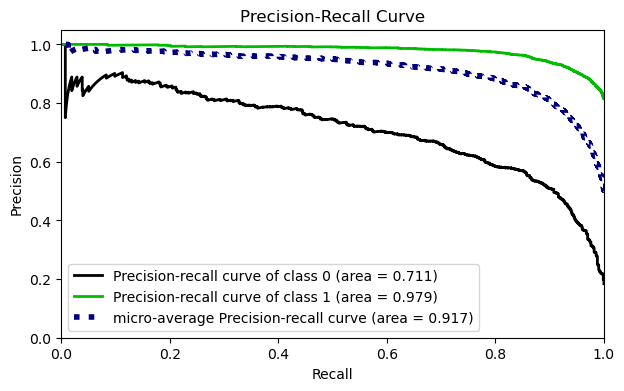

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = lr.predict_proba(X_test_count_LR)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba

array([[0.62961823, 0.37038177],
       [0.78541295, 0.21458705],
       [0.08102466, 0.91897534],
       ...,
       [0.05324657, 0.94675343],
       [0.2228677 , 0.7771323 ],
       [0.42182866, 0.57817134]])

In [ ]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test)

y_pred = lr.predict(X_test_count_LR)
log_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

In [ ]:
average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

0.711349145572416

### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf_LR = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf_LR = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf_LR.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_train_tfidf_LR = pd.DataFrame(X_train_tf_idf_LR.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              )
df_train_tfidf_LR

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

In [ ]:
df_train_tfidf_LR.loc[6].sort_values(ascending=False)
#We could notice that the term that reported with "low score" as term 'breast' indicates that not important and repated many times, while the term that reported with "high score" as term 'extra' indicates that it is important and unique which means does not repated

extra          0.426381
right          0.229123
opted          0.228838
accommodate    0.227926
breast         0.209445
                 ...   
flouncy        0.000000
flounce        0.000000
florida        0.000000
floreat        0.000000
zoom           0.000000
Name: 6, Length: 4882, dtype: float64

Creating the Model

In [ ]:
#We used 'class_weight' paramter since the target is inbalanced
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

lr1 = (LogisticRegression(C=0.04, max_iter=1000, class_weight="balanced"))
lr1.fit(X_train_tf_idf_LR, y_train)

LogisticRegression(C=0.04, class_weight='balanced', max_iter=1000)

In [ ]:
print("Logistic Regression MODEL")
eval(lr1, X_train_tf_idf_LR, X_test_tf_idf_LR)

Logistic Regression MODEL
[[ 718  116]
 [ 649 3046]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.86      0.65       834
           1       0.96      0.82      0.89      3695

    accuracy                           0.83      4529
   macro avg       0.74      0.84      0.77      4529
weighted avg       0.88      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.55      0.88      0.67      3267
           1       0.97      0.84      0.90     14845

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [ ]:
prediction = lr1.predict(X_test_tf_idf_LR)
prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
prediction_train=lr1.predict(X_train_tf_idf_LR)
prediction_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
model = LogisticRegression(C=0.04, max_iter=1000,class_weight="balanced" )
scores = cross_validate(model, X_train_tf_idf_LR, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.838229
train_accuracy         0.846572
test_precision-neg     0.532506
train_precision-neg    0.546681
test_recall-neg        0.851850
train_recall-neg       0.874979
test_f1-neg            0.655223
train_f1-neg           0.672921
dtype: float64

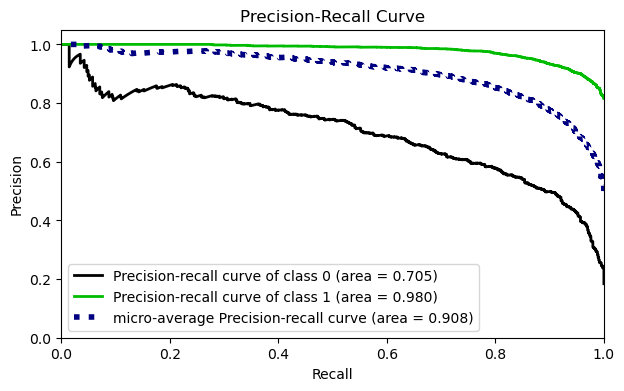

In [ ]:
y_pred_proba = lr1.predict_proba(X_test_tf_idf_LR)

plot_precision_recall(y_test, y_pred_proba)
plt.show()


In [ ]:
y_pred = lr1.predict(X_test_tf_idf_LR)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Naive Bayes

### Countvectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count_NB = vectorizer.fit_transform(X_train)
X_test_count_NB = vectorizer.transform(X_test)

In [ ]:
X_train_count_NB.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.naive_bayes import BernoulliNB # BernoulliNB for binary model

In [ ]:
nb = BernoulliNB()
nb.fit(X_train_count_NB,y_train)

BernoulliNB()

In [ ]:
print("NB MODEL")
eval(nb, X_train_count_NB, X_test_count_NB)

NB MODEL
[[ 593  241]
 [ 353 3342]]
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       834
           1       0.93      0.90      0.92      3695

    accuracy                           0.87      4529
   macro avg       0.78      0.81      0.79      4529
weighted avg       0.88      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3267
           1       0.95      0.92      0.94     14845

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_count_NB, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879859
train_accuracy         0.900539
test_precision-neg     0.648835
train_precision-neg    0.697508
test_recall-neg        0.729103
train_recall-neg       0.792130
test_f1-neg            0.686498
train_f1-neg           0.741812
dtype: float64

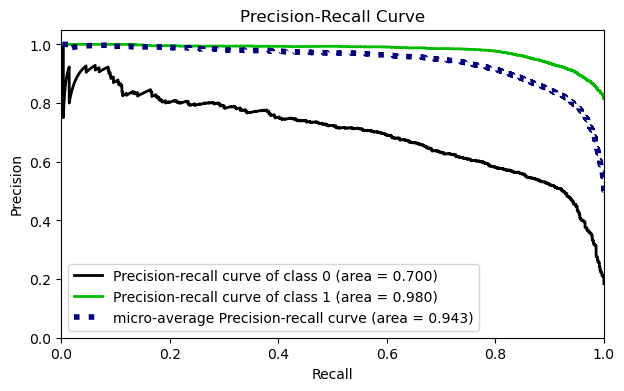

In [ ]:
y_pred_proba = nb.predict_proba(X_test_count_NB)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb.predict(X_test_count_NB)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [ ]:
X_train_tf_idf_NB = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf_NB = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf_NB.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf_NB.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

Model

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train_tf_idf_NB,y_train)

BernoulliNB()

In [ ]:
print("Naive Beyaz MODEL")
eval(nb1, X_train_tf_idf_NB, X_test_tf_idf_NB)

Naive Beyaz MODEL
[[ 593  241]
 [ 353 3342]]
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       834
           1       0.93      0.90      0.92      3695

    accuracy                           0.87      4529
   macro avg       0.78      0.81      0.79      4529
weighted avg       0.88      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3267
           1       0.95      0.92      0.94     14845

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf_NB, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.879859
train_accuracy         0.900539
test_precision-neg     0.648835
train_precision-neg    0.697508
test_recall-neg        0.729103
train_recall-neg       0.792130
test_f1-neg            0.686498
train_f1-neg           0.741812
dtype: float64

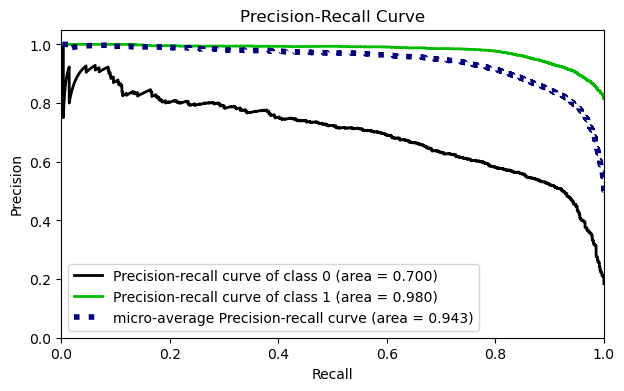

In [ ]:
y_pred_proba = nb1.predict_proba(X_test_tf_idf_NB)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb1.predict(X_test_tf_idf_NB)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
nb_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
X_train_count_SV = vectorizer.fit_transform(X_train)
X_test_count_SV = vectorizer.transform(X_test)

In [ ]:
X_train_count_SV.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.svm import LinearSVC
# we tried c=0.1 and it lead to overfit so we decrese the c to make the model able to generlize more
svc = LinearSVC(C=0.01,class_weight='balanced')
svc.fit(X_train_count_SV,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [ ]:
print("SVM MODEL")
eval(svc, X_train_count_SV, X_test_count_SV)

SVM MODEL
[[ 687  147]
 [ 498 3197]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       834
           1       0.96      0.87      0.91      3695

    accuracy                           0.86      4529
   macro avg       0.77      0.84      0.79      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.92      0.76      3267
           1       0.98      0.89      0.93     14845

    accuracy                           0.89     18112
   macro avg       0.81      0.90      0.84     18112
weighted avg       0.92      0.89      0.90     18112



In [ ]:
model = LinearSVC(C=0.01,class_weight='balanced')
scores = cross_validate(model, X_train_count_SV, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.862247
train_accuracy         0.896226
test_precision-neg     0.583635
train_precision-neg    0.649144
test_recall-neg        0.825831
train_recall-neg       0.924259
test_f1-neg            0.683856
train_f1-neg           0.762645
dtype: float64

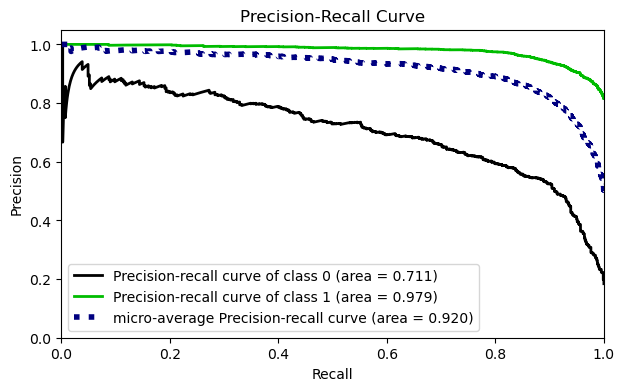

In [ ]:
y_pred_proba = svc._predict_proba_lr(X_test_count_SV)
#decision_function = svc.decision_function(X_test_count_SV)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = svc.predict(X_test_count_SV)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TD-IDF

In [ ]:
X_train_tf_idf_SV = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf_SV = tf_idf_vectorizer.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tf_idf_SV.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

In [ ]:
svc1 = LinearSVC(C=0.01,class_weight='balanced')
svc1.fit(X_train_tf_idf_SV,y_train)

LinearSVC(C=0.01, class_weight='balanced')

In [ ]:
print("SVM MODEL")
eval(svc1, X_train_tf_idf_SV, X_test_tf_idf_SV)

SVM MODEL
[[ 725  109]
 [ 605 3090]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       834
           1       0.97      0.84      0.90      3695

    accuracy                           0.84      4529
   macro avg       0.76      0.85      0.78      4529
weighted avg       0.89      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3267
           1       0.97      0.85      0.91     14845

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [ ]:
model = LinearSVC(C=0.01,class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf_SV, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.845738
train_accuracy         0.856437
test_precision-neg     0.546394
train_precision-neg    0.565012
test_recall-neg        0.858277
train_recall-neg       0.887018
test_f1-neg            0.667581
train_f1-neg           0.690307
dtype: float64

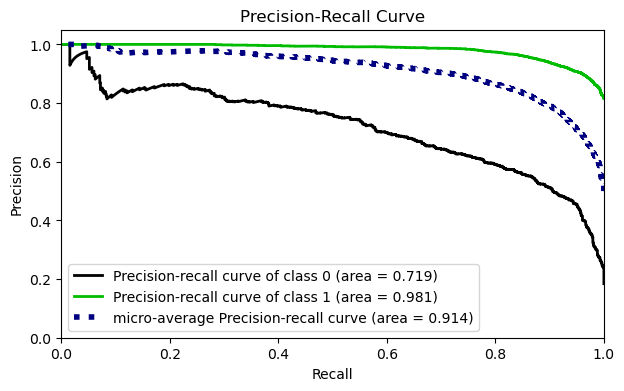

In [ ]:
y_pred_proba = svc1._predict_proba_lr(X_test_tf_idf_SV)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = svc1.predict(X_test_tf_idf_SV)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
svc_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Random Forest

### Countvectorizer

Countvectorizer

In [ ]:
X_train_count_RF = vectorizer.fit_transform(X_train)
X_test_count_RF = vectorizer.transform(X_test)

In [ ]:
X_train_count_RF.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
pd.DataFrame(X_train_count_RF.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0       0   0     0        0        0     0         0           0         0   
1       0   0     0        0        0     0         0           0         0   
2       0   0     0        0        0     0         0           1         0   
3       0   0     0        0        0     0         0           0         0   
4       0   0     0        0        0     0         0           0         0   
...    ..  ..   ...      ...      ...   ...       ...         ...       ...   
18107   0   0     0        0        0     0         0           0         0   
18108   0   0     0        0        0     0         0           0         0   
18109   0   0     0        0        0     0         0           0         0   
18110   0   0     0        0        0     0         0           2         0   
18111   0   0     0        0        0     0         0           0         0   

       absurd  abt  abundance  ac  accent  accented  accentuate  accentuated  \
0           0    0          0   0       0         0           0            0   
1           0    0          0   0       0         0           0            0   
2           0    0          0   0       0         0           0            0   
3           0    0          0   0       0         0           0            0   
4           0    0          0   0       0         0           0            0   
...       ...  ...        ...  ..     ...       ...         ...          ...   
18107       0    0          0   0       0         0           0            0   
18108       0    0          0   0       0         0           0            0   
18109       0    0          0   0       0         0           0            0   
18110       0    0          0   0       0         0           0            0   
18111       0    0          0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
18107            0             0       0           0       0            0   
18108            0             0       0           0       0            0   
18109            0             0       0           0       0            0   
18110            0             0       0           0       0            0   
18111            0             0       0           0       0            0   

       accessorized  accessorizing  ...  yesterday  yet  yikes  yo  yoga  \
0                 0              0  ...          0    0      0   0     0   
1                 0              0  ...          0    0      0   0     0   
2                 0              0  ...          0    0      0   0     0   
3                 0              0  ...          0    0      0   0     0   
4                 0              0  ...          0    0      0   0     0   
...             ...            ...  ...        ...  ...    ...  ..   ...   
18107             0              0  ...          0    0      0   0     0   
18108             0              0  ...          0    0      0   0     0   
18109             0              0  ...          0    0      0   0     0   
18110             0              0  ...          0    0      0   0     0   
18111             0              0  ...          0    0      0   0     0   

       yoke  york  young  younger  youre  youthful  yr  yuck  yummy  zag  \
0         0     0      0        0      0         0   0     0      0    0   
1         0     0      0        0      0         0   0     0      0    0   
2         0     0      0       

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# max_depth: The number of splits that each decision tree is allowed to make. If the number of splits is too low, the model underfits the data and if it is too high the model overfits.
rf = RandomForestClassifier(max_depth = 7, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count_RF, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [ ]:
print("RainForest MODEL")
eval(rf, X_train_count_RF, X_test_count_RF)

RainForest MODEL
[[ 693  141]
 [ 645 3050]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.83      0.64       834
           1       0.96      0.83      0.89      3695

    accuracy                           0.83      4529
   macro avg       0.74      0.83      0.76      4529
weighted avg       0.88      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      3267
           1       0.96      0.84      0.90     14845

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.86     18112



In [ ]:
prediction = rf.predict(X_test_count_RF)
prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
prediction_train=rf.predict(X_train_count_RF)
prediction_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
model = RandomForestClassifier(max_depth = 7, random_state = 101, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count_RF, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.828788
train_accuracy         0.846854
test_precision-neg     0.516228
train_precision-neg    0.548788
test_recall-neg        0.809912
train_recall-neg       0.853179
test_f1-neg            0.630443
train_f1-neg           0.667835
dtype: float64

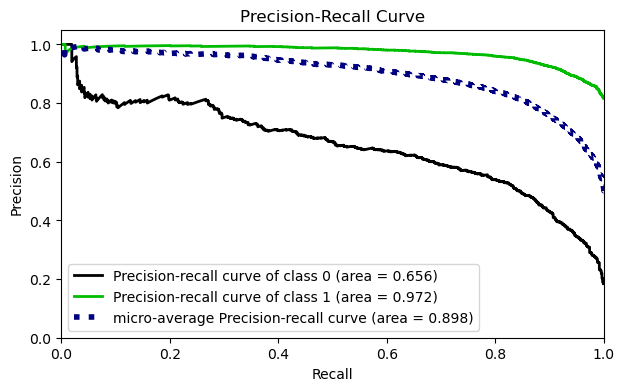

In [ ]:

y_pred_proba = rf.predict_proba(X_test_count_RF)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [ ]:
y_pred_proba

array([[0.53738043, 0.46261957],
       [0.57109248, 0.42890752],
       [0.43732468, 0.56267532],
       ...,
       [0.39450798, 0.60549202],
       [0.45944508, 0.54055492],
       [0.49897038, 0.50102962]])

In [ ]:
y_pred = rf.predict(X_test_count_RF)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [ ]:
X_train_tf_idf_RF = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf_RF = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf_RF.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_train_tfidf_RF = pd.DataFrame(X_train_tf_idf_RF.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              )
df_train_tfidf_RF

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

In [ ]:
df_train_tfidf_RF.loc[6].sort_values(ascending=False)

extra          0.426381
right          0.229123
opted          0.228838
accommodate    0.227926
breast         0.209445
                 ...   
flouncy        0.000000
flounce        0.000000
florida        0.000000
floreat        0.000000
zoom           0.000000
Name: 6, Length: 4882, dtype: float64

In [ ]:
rf1 = RandomForestClassifier(max_depth = 7, random_state = 101, n_jobs = -1, class_weight="balanced")
rf1.fit(X_train_tf_idf_RF, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [ ]:
print("RainForest MODEL")
eval(rf1, X_train_tf_idf_RF, X_test_tf_idf_RF)

RainForest MODEL
[[ 672  162]
 [ 661 3034]]
Test_Set
              precision    recall  f1-score   support

           0       0.50      0.81      0.62       834
           1       0.95      0.82      0.88      3695

    accuracy                           0.82      4529
   macro avg       0.73      0.81      0.75      4529
weighted avg       0.87      0.82      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      3267
           1       0.96      0.84      0.90     14845

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [ ]:
prediction = rf1.predict(X_test_tf_idf_RF)
prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
prediction_train=rf1.predict(X_train_tf_idf_RF)
prediction_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
model = RandomForestClassifier(max_depth = 7, random_state = 101, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf_RF, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.819346
train_accuracy         0.845265
test_precision-neg     0.499583
train_precision-neg    0.544775
test_recall-neg        0.801035
train_recall-neg       0.870523
test_f1-neg            0.615309
train_f1-neg           0.670023
dtype: float64

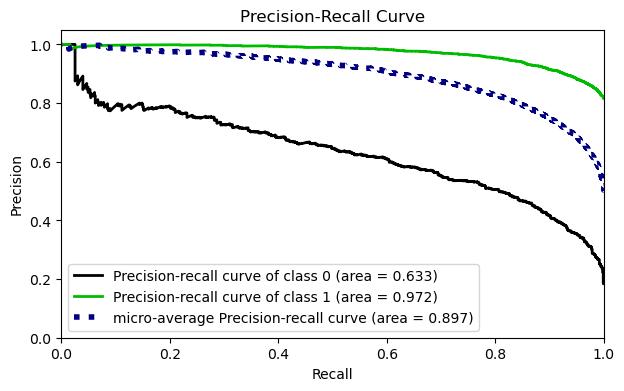

In [ ]:
y_pred_proba = rf1.predict_proba(X_test_tf_idf_RF)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [ ]:
y_pred = rf1.predict(X_test_tf_idf_RF)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Ada Boosting

### Countvectorizer

In [ ]:
X_train_count_AD = vectorizer.fit_transform(X_train)
X_test_count_AD = vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_count_AD, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada Boosting MODEL")
eval(ada, X_train_count_AD, X_test_count_AD)

Ada Boosting MODEL
[[ 403  431]
 [ 172 3523]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.48      0.57       834
           1       0.89      0.95      0.92      3695

    accuracy                           0.87      4529
   macro avg       0.80      0.72      0.75      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.52      0.60      3267
           1       0.90      0.96      0.93     14845

    accuracy                           0.88     18112
   macro avg       0.81      0.74      0.76     18112
weighted avg       0.87      0.88      0.87     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_count_AD, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.870970
train_accuracy         0.877264
test_precision-neg     0.697463
train_precision-neg    0.721192
test_recall-neg        0.503521
train_recall-neg       0.520967
test_f1-neg            0.584604
train_f1-neg           0.604927
dtype: float64

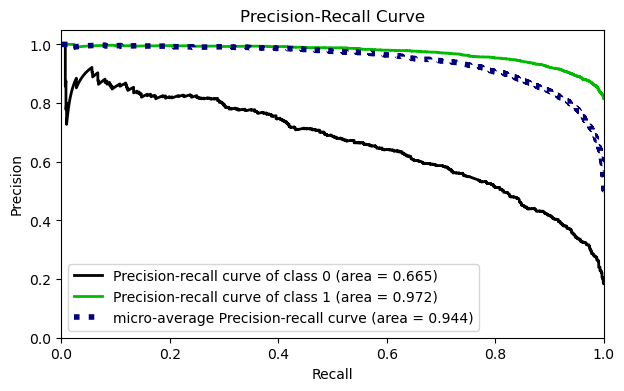

In [ ]:
y_pred_proba = ada.predict_proba(X_test_count_AD)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [ ]:
y_pred = ada.predict(X_test_count_AD)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_count_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [ ]:
X_train_tf_idf_AD = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf_AD = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf_AD.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_train_tfidf_AD = pd.DataFrame(X_train_tf_idf_AD.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              )
df_train_tfidf_AD

aa   ab  abby  abdomen  ability  able  absolute  absolutely  abstract  \
0      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.263946       0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
...    ...  ...   ...      ...      ...   ...       ...         ...       ...   
18107  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18108  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18109  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   
18110  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.190214       0.0   
18111  0.0  0.0   0.0      0.0      0.0   0.0       0.0    0.000000       0.0   

       absurd  abt  abundance   ac  accent  accented  accentuate  accentuated  \
0         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
1         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
2         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
3         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
4         0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
...       ...  ...        ...  ...     ...       ...         ...          ...   
18107     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18108     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18109     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18110     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   
18111     0.0  0.0        0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
18107          0.0           0.0     0.0         0.0     0.0          0.0   
18108          0.0           0.0     0.0         0.0     0.0          0.0   
18109          0.0           0.0     0.0         0.0     0.0          0.0   
18110          0.0           0.0     0.0         0.0     0.0          0.0   
18111          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...  yesterday  yet  yikes   yo  yoga  \
0               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
1               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
2               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
3               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
4               0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
...             ...            ...  ...        ...  ...    ...  ...   ...   
18107           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18108           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18109           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18110           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   
18111           0.0            0.0  ...        0.0  0.0    0.0  0.0   0.0   

       yoke  york  young  younger  youre  youthful   yr  yuck  yummy  zag  \
0       0.0   0.0    0.0      0.0    0.0       0.0  0.0   0.0    0.0  0.0   
1       0.0   0.0    0.0      0.0    0.0       0.0  0.0   

In [ ]:
ada1 = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada1.fit(X_train_tf_idf_AD, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print("Ada Boosting MODEL")
eval(ada1, X_train_tf_idf_AD, X_test_tf_idf_AD)

Ada Boosting MODEL
[[ 407  427]
 [ 174 3521]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.49      0.58       834
           1       0.89      0.95      0.92      3695

    accuracy                           0.87      4529
   macro avg       0.80      0.72      0.75      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.74      0.54      0.62      3267
           1       0.90      0.96      0.93     14845

    accuracy                           0.88     18112
   macro avg       0.82      0.75      0.78     18112
weighted avg       0.87      0.88      0.88     18112



In [ ]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_tf_idf_AD, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.870086
train_accuracy         0.883086
test_precision-neg     0.691284
train_precision-neg    0.737795
test_recall-neg        0.505357
train_recall-neg       0.545863
test_f1-neg            0.583627
train_f1-neg           0.627471
dtype: float64

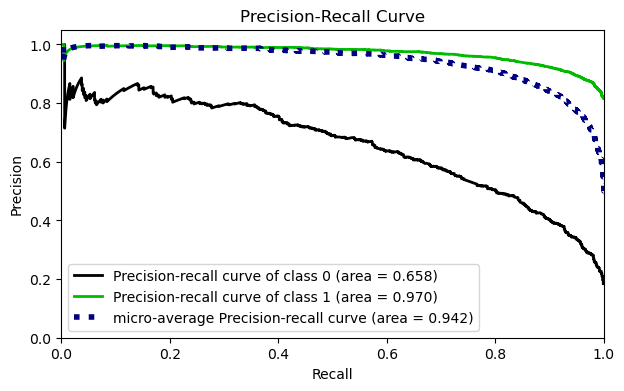

In [ ]:
y_pred_proba = ada1.predict_proba(X_test_tf_idf_AD)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [ ]:
y_pred = ada1.predict(X_test_tf_idf_AD)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = [0], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## DL modeling

In [ ]:
#pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df

Review  Class
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
22636  I was very happy to snag this dress at such a ...      1
22637  It reminds me of maternity clothes. soft, stre...      1
22638  This fit well, but the top was very see throug...      0
22639  I bought this dress for a wedding i have this ...      1
22640  This dress in a lovely platinum is feminine an...      1

[22641 rows x 2 columns]

In [ ]:
X = df['Review'].values
y = df['Class'].values

### Tokenization

In [ ]:
# The num_words hyperparameter indicates that only the first 16,000 words (tokens) that occur most frequently in the corpus
num_words = 15000

tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
# The word index is actually the ranking from the most frequent words to the least
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
# to converts all words in each row of our data into numbers according to their usage frequency
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [ ]:
X_num_tokens[50]

[7,
 6,
 4,
 69,
 25,
 20,
 66,
 849,
 355,
 105,
 138,
 8,
 172,
 5,
 78,
 59,
 70,
 232,
 3,
 33,
 68,
 2,
 104,
 7,
 11,
 9,
 1,
 106,
 10,
 131,
 19,
 306,
 5,
 64,
 1,
 47,
 434,
 31,
 62,
 7,
 6,
 19,
 1,
 366,
 47,
 12,
 4,
 2496,
 41,
 48,
 84,
 169,
 11,
 4,
 4245,
 49,
 7,
 15,
 9,
 4,
 244,
 47,
 2,
 252,
 1061,
 41,
 24,
 139,
 5]

In [ ]:
len(X_num_tokens[50])

69

In [ ]:
num_tokens = [len(token) for token in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 116

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad_seq = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre") #

In [ ]:
X_pad_seq

array([[  0,   0,   0, ..., 662,   3,  68],
       [  0,   0,   0, ...,   6, 772,  95],
       [  0,   0,   0, ..., 469,   5, 688],
       ...,
       [  0,   0,   0, ...,  24, 166,  34],
       [  0,   0,   0, ..., 129, 206, 185],
       [  0,   0,   0, ...,  35, 433, 205]])

In [ ]:
X_pad_seq.shape

(22641, 116)

### Train Set Split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_pad_seq, y, test_size=0.1, stratify=y, random_state=101)
#We divided the dataset into three splits since we should have validation set during train the DL model as ANN also the dataset size is large so it is conviente
X_train, X_test, y_train, y_test = train_test_split(X_pad_seq, y, stratify=y, test_size=0.10, random_state=101)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=101)

In [ ]:
x_val.shape

(2038, 116)

In [ ]:
y_train.shape

(18338,)

In [ ]:
y_test.shape

(2265,)

In [ ]:
X_train.shape

(18338, 116)

In [ ]:
X_test.shape

(2265, 116)

### Modeling

In [ ]:
emb_size = 50 # where emb stand for embedding

In [ ]:
from tensorflow.keras.layers import BatchNormalization #Batch Norm has a regularization effect where can be technique done between the layers of a Neural Network instead of in the raw data
model8 = Sequential()

model8.add(Embedding(input_dim=num_words,
                    output_dim=emb_size,
                    input_length=max_tokens))

model8.add(GRU(units=50,return_sequences=True))
model8.add(Dropout(0.2))
BatchNormalization(),
model8.add(GRU(units=25, return_sequences=True))
model8.add(Dropout(0.2))
BatchNormalization(),
model8.add(GRU(units=12, return_sequences=False))
model8.add(Dropout(0.2))
BatchNormalization(),
model8.add(Dense(1, activation="sigmoid"))

optimizer=Adam(learning_rate=0.003)
model8.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['Recall'])




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience = 2 , restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 2.7600842865743527, 1: 0.6106153436334576}

In [ ]:
model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 116, 50)           750000    
                                                                 
 gru_3 (GRU)                 (None, 116, 50)           15300     
                                                                 
 dropout_3 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_4 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_4 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_5 (GRU)                 (None, 12)                1404      
                                                                 
 dropout_5 (Dropout)         (None, 12)               

In [ ]:
model8.fit(X_train, y_train, epochs=10, batch_size=100, class_weight=train_class_weights,
         validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/10
184/184 [==============================] - 21s 66ms/step - loss: 0.4774 - recall: 0.7662 - val_loss: 0.4082 - val_recall: 0.7939
Epoch 2/10
184/184 [==============================] - 10s 54ms/step - loss: 0.2984 - recall: 0.8646 - val_loss: 0.2697 - val_recall: 0.9059
Epoch 3/10
184/184 [==============================] - 10s 55ms/step - loss: 0.2264 - recall: 0.8962 - val_loss: 0.3024 - val_recall: 0.8922
Epoch 4/10
184/184 [==============================] - 10s 55ms/step - loss: 0.1688 - recall: 0.9243 - val_loss: 0.3257 - val_recall: 0.8975
Epoch 4: early stopping


### Model Evaluation

In [ ]:
loss_df = pd.DataFrame(model8.history.history)
loss_df.tail(10)

loss    recall  val_loss  val_recall
0  0.477363  0.766249  0.408200    0.793889
1  0.298419  0.864611  0.269746    0.905932
2  0.226362  0.896177  0.302363    0.892151
3  0.168823  0.924347  0.325718    0.897543

<Figure size 900x900 with 0 Axes>

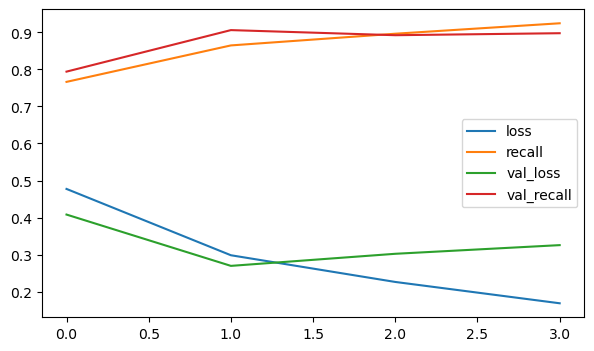

In [ ]:
plt.figure(figsize=(9,9))
loss_df.plot()
plt.show()

In [ ]:
loss, Recall = model8.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.291081041097641
Recall:  0.9018868207931519


In [ ]:
y_pred = model8.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 18ms/step
[[ 316   94]
 [ 182 1673]]
              precision    recall  f1-score   support

           0       0.63      0.77      0.70       410
           1       0.95      0.90      0.92      1855

    accuracy                           0.88      2265
   macro avg       0.79      0.84      0.81      2265
weighted avg       0.89      0.88      0.88      2265



In [ ]:
model8.evaluate(X_test, y_test)

71/71 [==============================] - 2s 20ms/step - loss: 0.2911 - recall: 0.9019


[0.291081041097641, 0.9018868207931519]

In [ ]:
model8.evaluate(X_train, y_train)

574/574 [==============================] - 11s 20ms/step - loss: 0.1886 - recall: 0.9295


[0.18860535323619843, 0.929541826248169]

In [ ]:
model8.save('project_deep_learning_GUR_last.h5')

In [ ]:
#y_pred = model6.predict(X_test)
GUR_recall_neg = recall_score(y_test, y_pred, labels = [0], average = None)
GUR_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
GUR_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

Modling with LSTM

In [ ]:
from tensorflow.keras.layers import BatchNormalization #Batch Norm has a regularization effect where can be technique done between the layers of a Neural Network instead of in the raw data
model9 = Sequential()

model9.add(Embedding(input_dim=num_words,
                    output_dim=emb_size,
                    input_length=max_tokens))

model9.add(LSTM(units=50,return_sequences=True))
model9.add(Dropout(0.2))
BatchNormalization(),
model9.add(LSTM(units=25, return_sequences=True))
model9.add(Dropout(0.2))
BatchNormalization(),
model9.add(LSTM(units=12, return_sequences=False))
model9.add(Dropout(0.2))
BatchNormalization(),
model9.add(Dense(1, activation="sigmoid"))

optimizer=Adam(learning_rate=0.003)
model9.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['Recall'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience = 2, restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 2.7600842865743527, 1: 0.6106153436334576}

In [ ]:
model9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 116, 50)           750000    
                                                                 
 lstm (LSTM)                 (None, 116, 50)           20200     
                                                                 
 dropout_6 (Dropout)         (None, 116, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 116, 25)           7600      
                                                                 
 dropout_7 (Dropout)         (None, 116, 25)           0         
                                                                 
 lstm_2 (LSTM)               (None, 12)                1824      
                                                                 
 dropout_8 (Dropout)         (None, 12)               

In [ ]:
model9.fit(X_train, y_train, epochs=10, batch_size=100, class_weight=train_class_weights,
         validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/10
184/184 [==============================] - 25s 68ms/step - loss: 0.4366 - recall: 0.7862 - val_loss: 0.3044 - val_recall: 0.8772
Epoch 2/10
184/184 [==============================] - 10s 54ms/step - loss: 0.2825 - recall: 0.8687 - val_loss: 0.3891 - val_recall: 0.8095
Epoch 3/10
184/184 [==============================] - 10s 54ms/step - loss: 0.2079 - recall: 0.9018 - val_loss: 0.3238 - val_recall: 0.8963
Epoch 4/10
184/184 [==============================] - 10s 55ms/step - loss: 0.1825 - recall: 0.9200 - val_loss: 0.3756 - val_recall: 0.8394
Epoch 5/10
184/184 [==============================] - 10s 56ms/step - loss: 0.1430 - recall: 0.9393 - val_loss: 0.3606 - val_recall: 0.8910
Epoch 5: early stopping


In [ ]:
loss_df = pd.DataFrame(model9.history.history)
loss_df.tail(10)

loss    recall  val_loss  val_recall
0  0.436597  0.786161  0.304414    0.877172
1  0.282506  0.868740  0.389134    0.809467
2  0.207945  0.901771  0.323752    0.896345
3  0.182456  0.920019  0.375556    0.839425
4  0.142955  0.939265  0.360593    0.890953

<Figure size 900x900 with 0 Axes>

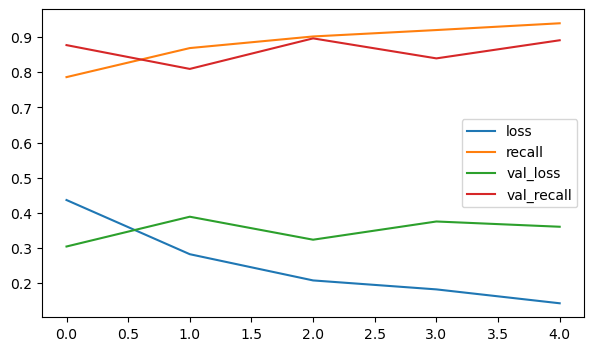

In [ ]:
plt.figure(figsize=(9,9)) #we can notice that GRU model is better than LSTM where LSTM is highly overfit
loss_df.plot()
plt.show()

In [ ]:
loss, Recall = model9.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.3359527289867401
Recall:  0.8938005566596985


In [ ]:
y_pred = model9.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 18ms/step
[[ 308  102]
 [ 197 1658]]
              precision    recall  f1-score   support

           0       0.61      0.75      0.67       410
           1       0.94      0.89      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.82      0.80      2265
weighted avg       0.88      0.87      0.87      2265



In [ ]:
model9.evaluate(X_test, y_test)

71/71 [==============================] - 2s 20ms/step - loss: 0.3360 - recall: 0.8938


[0.3359527289867401, 0.8938005566596985]

In [ ]:
model9.evaluate(X_train, y_train)

574/574 [==============================] - 12s 21ms/step - loss: 0.1866 - recall: 0.9295


[0.18662197887897491, 0.9294752478599548]

In [ ]:
model9.save('project_deep_learning_LSTM_LSTM.h5')

In [ ]:
LSTM_recall_neg = recall_score(y_test, y_pred, labels = [0], average = None)
LSTM_f1_neg = f1_score(y_test, y_pred, labels = [0], average = None)
LSTM_neg = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## BERT Modeling

In [1]:
#installing Transformers as BERT models are built on top of transformers
!pip install transformers

In [2]:
#importing main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [3]:
df2 = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
#df2 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df2.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
print('df2 size :', df2.shape)

df2 size : (23486, 11)


In [5]:
sum(df2.duplicated()) # There are no  duplicated rows in corpus

0

In [6]:
# to remove spaces in columns and replace them with underscore
df2.columns= df2.columns.str.replace(" ", "_")

In [7]:
df2=df2[['Review_Text','Recommended_IND']]
df2.head()

Review_Text  Recommended_IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [8]:
df2.rename(columns={"Review_Text":"Review", "Recommended_IND":"Class"}, inplace=True)
df2.head()

Review  Class
0  Absolutely wonderful - silky and sexy and comf...      1
1  Love this dress!  it's sooo pretty.  i happene...      1
2  I had such high hopes for this dress and reall...      0
3  I love, love, love this jumpsuit. it's fun, fl...      1
4  This shirt is very flattering to all due to th...      1

In [9]:
df2.isnull().sum() # There are  missing values

Review    845
Class       0
dtype: int64

In [10]:
# since it is a text its better to drop all the missing
# deleting missed vales
df2.dropna(inplace = True)
df2.reset_index(drop=True, inplace=True)
df2

Review  Class
0      Absolutely wonderful - silky and sexy and comf...      1
1      Love this dress!  it's sooo pretty.  i happene...      1
2      I had such high hopes for this dress and reall...      0
3      I love, love, love this jumpsuit. it's fun, fl...      1
4      This shirt is very flattering to all due to th...      1
...                                                  ...    ...
22636  I was very happy to snag this dress at such a ...      1
22637  It reminds me of maternity clothes. soft, stre...      1
22638  This fit well, but the top was very see throug...      0
22639  I bought this dress for a wedding i have this ...      1
22640  This dress in a lovely platinum is feminine an...      1

[22641 rows x 2 columns]

In [11]:
# A lot of null in the reviews
print(df2.isnull().sum())

Review    0
Class     0
dtype: int64


### Train test split

In [12]:
from transformers import AutoTokenizer, AutoModel, TFAutoModel, AutoConfig
#from transformers import pipeline

In [13]:
X = df2['Review'].values
y = df2['Class'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=101)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=101)




### Tokenization

In [15]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [16]:
np.array(num_of_sent_tokens).mean()

76.75659202332052

In [17]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [18]:
tokenizer.vocab

{'examine': 11628,
 'aesthetic': 12465,
 'ivory': 11554,
 'investigator': 14064,
 'bad': 2919,
 '149': 17332,
 '##chia': 20881,
 '##pper': 18620,
 'federation': 4657,
 'slid': 4934,
 '##ginal': 24965,
 'burt': 18611,
 'cape': 4880,
 '570': 24902,
 '##艹': 30465,
 'glendale': 27649,
 'renovation': 10525,
 'understanding': 4824,
 'drip': 27304,
 '##nian': 11148,
 'binding': 8031,
 'wireless': 9949,
 '[unused832]': 837,
 'pointed': 4197,
 'parishes': 11600,
 '##kill': 15872,
 'bracing': 25919,
 'ə': 1114,
 'started': 2318,
 'bowls': 15220,
 'countries': 3032,
 'illicit': 25049,
 '##uso': 26658,
 'edge': 3341,
 '1913': 5124,
 '##meral': 28990,
 '##正': 30414,
 '##naut': 24619,
 '##riam': 25557,
 'wherever': 11210,
 'libertadores': 27968,
 'subterranean': 28811,
 'initiative': 6349,
 '##&': 29617,
 'sculpted': 19921,
 'radio': 2557,
 'granada': 16553,
 'sharks': 12004,
 'politicians': 8801,
 'weep': 27874,
 '##acing': 26217,
 'remainder': 6893,
 'achilles': 23167,
 'losers': 23160,
 'fright':

In [19]:
print(len(tokenizer.vocab))

# There are 30522 unique tokens in BERT cased model

30522


### Fixing token counts of all documents

In [20]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [21]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [22]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [23]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [24]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_val = transformation(x_val)

In [25]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [26]:
labels_val = y_val.reshape(-1,1)
labels_val

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [27]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [28]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_val,
                                                   labels_val))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [29]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [30]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_val = dataset_test.map(map_func)

### Batch Size

In [31]:
batch_size = 16 #due to avoid the error "OOM means out of memory."

# The developers who developed the BERT model recommend using batch sizes of 16 and 32.

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_val.batch(batch_size)

In [32]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 162), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [33]:
!pip install -q tf-models-official

In [34]:
len(X_train)

18338

In [35]:
len(X_train)/16

1146.125

In [36]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

2294
229


### Creating optimization

In [37]:
from official.nlp import optimization
epochs = 2
#batch_size = 64
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with GPU

In [38]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)



In [42]:
#!pip3 install --upgrade tqdm

In [39]:
!pip install keras==2.6.0


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.6.0 which is incompatible.


In [40]:
!pip3 install tensorflow

  Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [41]:
#with strategy.scope():
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall
#from sklearn.metrics import accuracy_score, recall_score


optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
loss = BinaryCrossentropy()
xx = Recall()
model3 = create_model()
model3.compile(optimizer=optimizer, loss=loss, metrics=[xx])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [42]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                       

### Model Fiting

In [43]:
%env TF_ENABLE_EAGER_CLIENT_STREAMING_ENQUEUE=False #to prevent error clling same metric many times

#%ENV == ['TF_ENABLE_EAGER_CLIENT_STREAMING_ENQUEUE']='False'`

env: TF_ENABLE_EAGER_CLIENT_STREAMING_ENQUEUE=False #to prevent error clling same metric many times


In [44]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [45]:
pd.Series(y).value_counts(normalize=True)

1    0.818868
0    0.181132
dtype: float64

In [46]:
weights = {0:0.18, 1:0.81}

In [47]:
model3.fit(train_ds, validation_data=val_ds, epochs=epochs, class_weight=weights)

Epoch 1/2
1147/1147 [==============================] - 708s 581ms/step - loss: 0.3686 - recall: 0.8576 - val_loss: 0.4912 - val_recall: 0.9455
Epoch 2/2
1147/1147 [==============================] - 681s 594ms/step - loss: 0.2290 - recall: 0.9606 - val_loss: 0.4855 - val_recall: 0.9503


### Model evaluation

In [48]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.368604  0.857619  0.491199    0.945476
1  0.229021  0.960642  0.485468    0.950270

In [50]:
model3.evaluate(train_ds) #evaluting the model in training set recal = 98%

1147/1147 [==============================] - 225s 196ms/step - loss: 0.2156 - recall: 0.9814


[0.215596005320549, 0.981353223323822]

In [51]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [54]:
Xids_test, Xmask_test = transformation(X_test)

In [55]:
dataset_test2 = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test2

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [56]:
dataset_test3 = dataset_test2.map(map_func)

In [57]:
test_ds = dataset_test3.batch(batch_size)

In [58]:
model3.evaluate(test_ds) #evaluting the model in unseen data recall= 96% which is good

142/142 [==============================] - 29s 201ms/step - loss: 0.3383 - recall: 0.9682


[0.33828386664390564, 0.9681940674781799]

In [62]:
y_pred_proba = model3.predict(test_ds)
average_precision_score(y_test, y_pred_proba)

142/142 [==============================] - 27s 191ms/step


0.9910729200630342

In [66]:
from sklearn.metrics import classification_report

y_pred = model3.predict(test_ds) >= 0.5


print(classification_report(y_test, y_pred))

142/142 [==============================] - 28s 195ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       410
           1       0.95      0.97      0.96      1855

    accuracy                           0.94      2265
   macro avg       0.90      0.88      0.89      2265
weighted avg       0.93      0.94      0.93      2265



In [67]:
from sklearn.metrics import average_precision_score, f1_score, recall_score
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "GRU", "LSTM" , "BERT"],

                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0],GUR_f1_neg[0], LSTM_f1_neg[0], BERT_with_weighted_f1[0]],

                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],rf_count_rec_neg[0], ada_count_rec_neg[0],
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0], GUR_recall_neg[0], LSTM_recall_neg[0], BERT_with_weighted_rec[0]],

                        "Average_Precision_Score_Negative": [nb_count_AP_neg, log_count_AP_neg, svc_count_AP_neg, rf_count_AP_neg,
                                                          ada_count_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,rf_tfidf_AP_neg, ada_tfidf_AP_neg, GUR_neg, LSTM_neg,BERT_with_weighted_AP]})

compare

Model  F1_Score_Negative  Recall_Score_Negative  \
0      NaiveBayes_count           0.666292               0.711031   
1          LogReg_count           0.680851               0.844125   
2             SVM_count           0.680535               0.823741   
3   Random Forest_count           0.638122               0.830935   
4        AdaBoost_count           0.572037               0.483213   
5      NaiveBayes_tfidf           0.666292               0.711031   
6          LogReg_tfidf           0.652431               0.860911   
7             SVM_tfidf           0.670055               0.869305   
8   Random Forest_tfidf           0.620212               0.805755   
9        AdaBoost_tfidf           0.575265               0.488010   
10                  GRU           0.678213               0.907317   
11                 LSTM           0.665445               0.885366   

    Average_Precision_Score_Negative  
0                           0.699656  
1                           0.711349  
2                           0.710836  
3                           0.655830  
4                           0.664521  
5                           0.699656  
6                           0.704846  
7                           0.718758  
8                           0.632707  
9                           0.657840  
10                          0.657840  
11                          0.657840

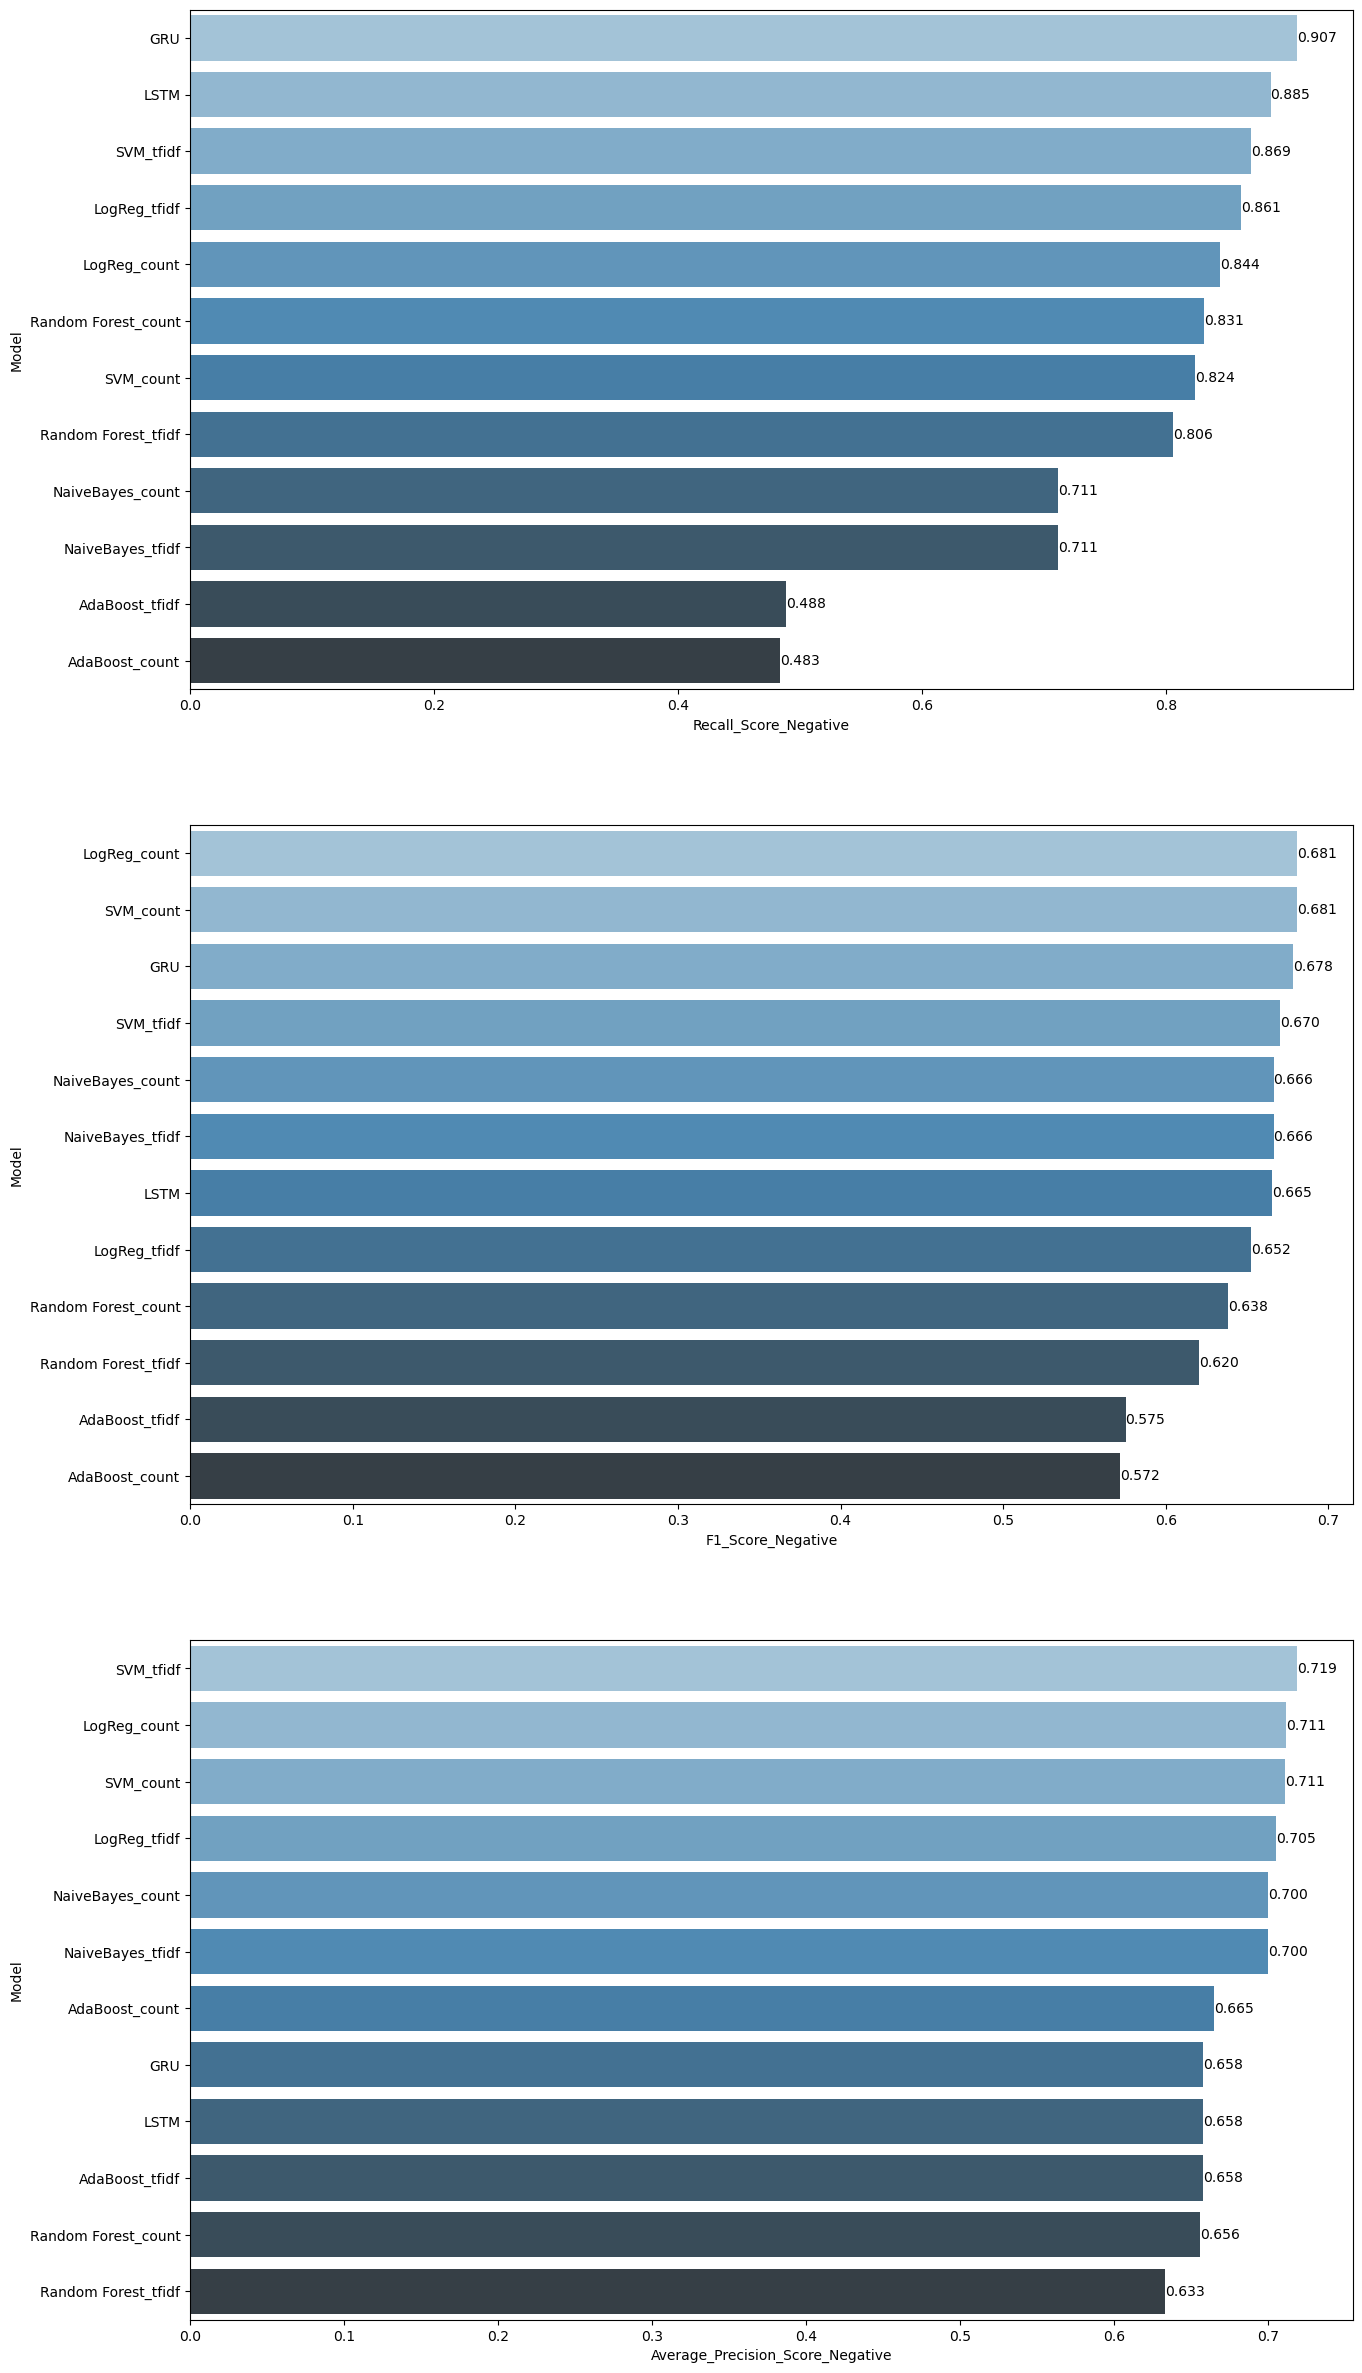

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

 Becuse of  the GPU limitted memory we can not retrain the ML and DL models again and as you can see from the BERT model in class negative reported score as  79%. However, when we compared it with ML and DL models it reported low socre of Recall than ML and DL models. Thus, the ML and DL models recall socre are better than BERT model even thought we used class whight paramter.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___